In [25]:
import numpy as np
import matplotlib.pyplot as plt
import random

### Uraian Fungsi `hitung_jarak_euclidean`

Fungsi `hitung_jarak_euclidean` menghitung jarak antara dua kota menggunakan rumus jarak Euclidean, yaitu akar kuadrat dari jumlah kuadrat perbedaan koordinat x dan y kedua kota. Dalam implementasinya, fungsi ini mengambil koordinat x dan y dari dua kota, menghitung perbedaan antara koordinat yang sesuai, mengkuadratkan perbedaan tersebut, menjumlahkannya, dan akhirnya mengambil akar kuadrat dari hasil penjumlahan untuk mendapatkan jarak Euclidean.

In [26]:
# Fungsi untuk menghitung jarak Euclidean antara dua kota
def hitung_jarak_euclidean(kota1, kota2):
    return np.sqrt((kota1[0] - kota2[0])**2 + (kota1[1] - kota2[1])**2)

### Uraian Fungsi `hitung_jarak_total`

Fungsi `hitung_jarak_total` digunakan untuk menghitung total jarak perjalanan dalam masalah Salesman Keliling (Travelling Salesman Problem - TSP) dengan memastikan bahwa perjalanan berakhir di kota awal setelah mengunjungi semua kota lain. Fungsi ini menerima dua parameter: `perjalanan`, yang merupakan daftar indeks kota yang menggambarkan urutan kunjungan, dan `matriks_jarak`, yang merupakan matriks dua dimensi di mana elemen [i, j] menyimpan jarak dari kota i ke kota j. Fungsi ini pertama-tama menambahkan kota awal ke akhir daftar perjalanan untuk membentuk siklus tertutup, kemudian menghitung total jarak dengan menjumlahkan jarak antara setiap kota berturut-turut dalam perjalanan tersebut menggunakan indeks yang disimpan dalam `perjalanan_lengkap`.

In [27]:
# Fungsi untuk menghitung total jarak perjalanan
def hitung_jarak_total(perjalanan, matriks_jarak):
    perjalanan_lengkap = perjalanan + [perjalanan[0]]
    return sum(matriks_jarak[perjalanan_lengkap[i], perjalanan_lengkap[i+1]] for i in range(len(perjalanan_lengkap)-1))


### Uraian Fungsi `buat_populasi_awal`

Fungsi `buat_populasi_awal` digunakan untuk menginisialisasi populasi awal dalam algoritma genetika untuk masalah Salesman Keliling (Travelling Salesman Problem - TSP). Fungsi ini menerima dua parameter: `jumlah_kota`, yang menentukan jumlah kota dalam permasalahan, dan `ukuran_populasi`, yang menentukan berapa banyak individu atau solusi yang akan ada dalam populasi awal. Fungsi ini menghasilkan daftar perjalanan, di mana setiap perjalanan adalah daftar indeks kota yang diacak. Ini dilakukan dengan menggunakan fungsi `random.sample` yang mengambil sampel tanpa penggantian dari kisaran indeks kota, sehingga setiap kota muncul tepat satu kali dalam setiap perjalanan. Hasilnya adalah populasi awal dari perjalanan yang unik dan acak, siap untuk proses evolusi selanjutnya dalam algoritma genetika.

In [28]:

# Fungsi untuk membuat populasi awal
def buat_populasi_awal(jumlah_kota, ukuran_populasi):
    return [random.sample(range(jumlah_kota), jumlah_kota) for _ in range(ukuran_populasi)]


### Uraian Fungsi `seleksi_turnamen`

Fungsi `seleksi_turnamen` digunakan dalam algoritma genetika untuk memilih individu (dalam konteks ini, solusi perjalanan TSP) yang akan menjadi orang tua untuk generasi berikutnya. Fungsi ini menggunakan metode seleksi turnamen, di mana sejumlah individu dipilih secara acak dari populasi, dan individu dengan skor terbaik (dalam hal ini, jarak terpendek) dipilih sebagai pemenang turnamen.

#### Parameter Fungsi:
- `populasi`: Daftar yang berisi semua individu dalam populasi saat ini.
- `skor`: Daftar yang berisi skor untuk setiap individu dalam populasi, di mana skor lebih rendah menunjukkan kinerja yang lebih baik.
- `k`: Jumlah individu yang dipilih untuk turnamen, dengan nilai default adalah 3.

#### Proses Seleksi:
1. Fungsi ini pertama-tama menggabungkan `populasi` dan `skor` menjadi satu daftar tuple, di mana setiap tuple berisi individu dan skor yang sesuai.
2. Dari daftar gabungan ini, fungsi `random.sample` digunakan untuk memilih `k` individu secara acak untuk berpartisipasi dalam turnamen.
3. Daftar individu yang terpilih diurutkan berdasarkan skor mereka menggunakan `sort` dengan `key=lambda x: x[1]`, yang berarti daftar akan diurutkan berdasarkan elemen kedua dari setiap tuple (yaitu skor).
4. Individu dengan skor terendah (jarak terpendek) dipilih sebagai pemenang turnamen dan dikembalikan oleh fungsi sebagai orang tua untuk generasi berikutnya.

#### Kegunaan:
Metode seleksi turnamen membantu dalam mempertahankan variasi genetik dalam populasi dengan memberikan kesempatan kepada individu dengan kinerja baik untuk dipilih sebagai orang tua, tetapi juga memungkinkan individu dengan kinerja kurang baik untuk memiliki kesempatan memenangkan turnamen, tergantung pada pemilihan acak dan ukuran turnamen.

In [29]:
# Fungsi untuk seleksi orang tua menggunakan metode turnamen
def seleksi_turnamen(populasi, skor, k=3):
    turnamen = random.sample(list(zip(populasi, skor)), k)
    turnamen.sort(key=lambda x: x[1])
    return turnamen[0][0]


### Uraian Fungsi `persilangan`

Fungsi `persilangan` digunakan dalam algoritma genetika untuk menggabungkan informasi genetik dari dua orang tua dan menghasilkan keturunan baru. Proses ini dimulai dengan memilih dua titik potong secara acak pada kromosom orang tua, yang dalam hal ini adalah urutan kota dalam perjalanan. Bagian dari kromosom orang tua pertama antara dua titik ini disalin ke anak, dan kota-kota yang tidak termasuk dalam segmen ini diambil dari orang tua kedua, mempertahankan urutan asli mereka. Ini memastikan bahwa semua kota tetap muncul tepat satu kali dalam perjalanan anak, sambil mencampur urutan kota dari kedua orang tua, sehingga meningkatkan variasi genetik dalam populasi.

In [30]:

# Fungsi untuk melakukan persilangan (reproduksi)
def persilangan(ortu1, ortu2):
    ukuran = len(ortu1)
    p, q = sorted(random.sample(range(ukuran), 2))
    sementara = ortu1[p:q+1]
    anak = [kota for kota in ortu2 if kota not in sementara]
    return anak[:p] + sementara + anak[p:]


### Uraian Fungsi `mutasi`

Fungsi `mutasi` dalam konteks algoritma genetika untuk masalah Salesman Keliling (TSP) bertujuan untuk memperkenalkan variasi genetik ke dalam populasi dengan cara mengubah urutan kota dalam perjalanan. Fungsi ini menerima dua parameter: `perjalanan`, yang merupakan daftar indeks kota yang menunjukkan urutan kunjungan, dan `tingkat_mutasi`, yang merupakan probabilitas di mana mutasi akan terjadi. Jika nilai acak yang dihasilkan lebih rendah dari `tingkat_mutasi`, fungsi ini akan memilih dua indeks secara acak dalam perjalanan dan menukar posisi kota-kota pada indeks tersebut. Proses ini membantu dalam menjaga keanekaragaman genetik dalam populasi, yang penting untuk menghindari konvergensi prematur pada solusi lokal dan membantu dalam pencarian solusi global yang lebih optimal.

In [31]:


# Fungsi untuk melakukan mutasi
def mutasi(perjalanan, tingkat_mutasi):
    if random.random() < tingkat_mutasi:
        i, j = random.sample(range(len(perjalanan)), 2)
        perjalanan[i], perjalanan[j] = perjalanan[j], perjalanan[i]
    return perjalanan

### Uraian Fungsi `algoritma_genetika`

Fungsi `algoritma_genetika` merupakan fungsi utama yang mengimplementasikan algoritma genetika untuk menyelesaikan masalah Salesman Keliling (TSP). Fungsi ini mengambil empat parameter: `kota`, yang merupakan daftar tuple koordinat kota; `ukuran_populasi`, yang menentukan jumlah solusi dalam populasi; `jumlah_generasi`, yang menentukan berapa kali iterasi atau generasi akan dijalankan; dan `tingkat_mutasi`, yang menentukan probabilitas terjadinya mutasi pada setiap individu dalam populasi.

#### Proses Algoritma:
1. **Inisialisasi Populasi**: Fungsi ini pertama-tama menghitung jumlah kota dan menginisialisasi matriks jarak antar kota menggunakan fungsi `hitung_jarak_euclidean`. Kemudian, populasi awal dihasilkan menggunakan fungsi `buat_populasi_awal`.
2. **Evaluasi Awal**: Setiap perjalanan dalam populasi dievaluasi untuk menentukan jarak total menggunakan fungsi `hitung_jarak_total`. Skor terbaik dan perjalanan terbaik dicatat.
3. **Iterasi Generasi**: Untuk setiap generasi, fungsi ini melakukan proses seleksi, persilangan, dan mutasi:
   - **Seleksi**: Dua orang tua dipilih dari populasi menggunakan fungsi `seleksi_turnamen`.
   - **Persilangan**: Keturunan baru dihasilkan dari dua orang tua tersebut menggunakan fungsi `persilangan`.
   - **Mutasi**: Keturunan tersebut mungkin mengalami mutasi, yang diatur oleh `tingkat_mutasi`, menggunakan fungsi `mutasi`.
4. **Evaluasi dan Seleksi Generasi Berikutnya**: Populasi baru dievaluasi, dan skor serta perjalanan terbaik diperbarui jika ditemukan solusi yang lebih baik.
5. **Pencatatan Riwayat**: Skor terbaik dari setiap generasi dicatat untuk analisis lebih lanjut.

#### Output:
Fungsi mengembalikan `perjalanan_terbaik`, `riwayat_fitness` yang mencatat skor terbaik setiap generasi, dan `skor_terbaik` yang merupakan skor dari perjalanan terbaik yang ditemukan selama proses algoritma.

#### Kegunaan:
Fungsi ini memungkinkan pencarian solusi optimal untuk TSP dengan menggunakan teknik algoritma genetika, yang menggabungkan prinsip seleksi alam, rekombinasi genetik, dan mutasi untuk menemukan solusi yang paling efisien dalam menyelesaikan masalah yang diberikan.

In [32]:


# Fungsi utama untuk menjalankan algoritma genetika
def algoritma_genetika(kota, ukuran_populasi, jumlah_generasi, tingkat_mutasi):
    jumlah_kota = len(kota)
    matriks_jarak = np.array([[hitung_jarak_euclidean(c1, c2) for c2 in kota] for c1 in kota])
    populasi = buat_populasi_awal(jumlah_kota, ukuran_populasi)
    skor = [hitung_jarak_total(perjalanan, matriks_jarak) for perjalanan in populasi]
    skor_terbaik = min(skor)
    perjalanan_terbaik = populasi[skor.index(skor_terbaik)]
    riwayat_fitness = [skor_terbaik]
    for _ in range(jumlah_generasi):
        populasi_baru = []
        for _ in range(ukuran_populasi):
            ortu1 = seleksi_turnamen(populasi, skor)
            ortu2 = seleksi_turnamen(populasi, skor)
            anak = persilangan(ortu1, ortu2)
            anak = mutasi(anak, tingkat_mutasi)
            populasi_baru.append(anak)
        populasi = populasi_baru
        skor = [hitung_jarak_total(perjalanan, matriks_jarak) for perjalanan in populasi]
        skor_terbaik_sekarang = min(skor)
        if skor_terbaik_sekarang < skor_terbaik:
            skor_terbaik = skor_terbaik_sekarang
            perjalanan_terbaik = populasi[skor.index(skor_terbaik)]
        riwayat_fitness.append(skor_terbaik)
    return perjalanan_terbaik, riwayat_fitness, skor_terbaik


In [33]:

# Parameter
jumlah_kota = 20
ukuran_populasi = 300
jumlah_generasi = 1000
tingkat_mutasi = 0.05



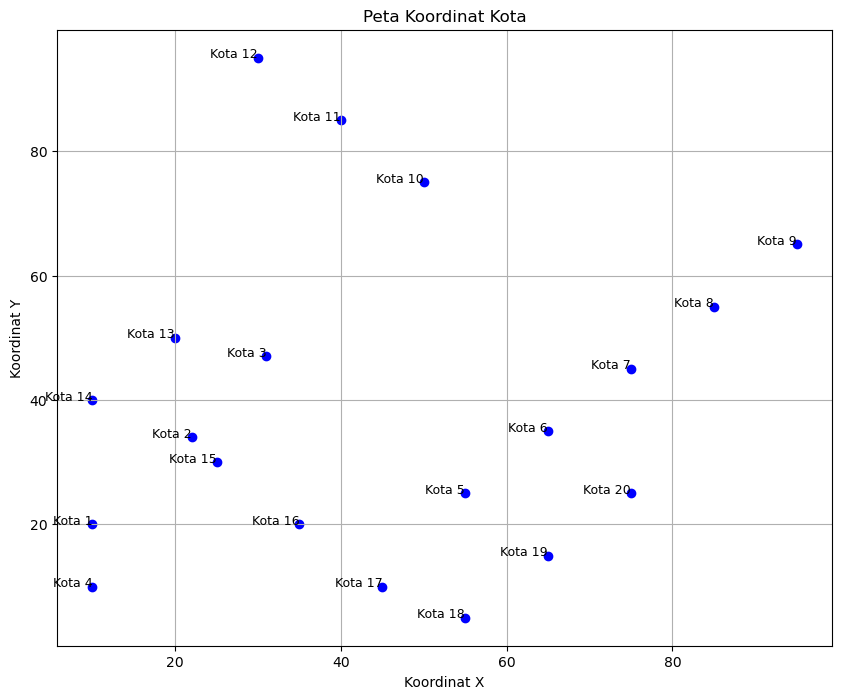

In [34]:
# Koordinat kota yang ditentukan secara manual
kota = [
    (10, 20), (22, 34), (31, 47), (10, 10), (55, 25),
    (65, 35), (75, 45), (85, 55), (95, 65), (50, 75),
    (40, 85), (30, 95), (20, 50), (10, 40), (25, 30),
    (35, 20), (45, 10), (55, 5), (65, 15), (75, 25)
]

# Membuat plot
plt.figure(figsize=(10, 8))
for idx, (x, y) in enumerate(kota):
    plt.scatter(x, y, color='blue')  # Plot titik kota
    plt.text(x, y, f'Kota {idx+1}', fontsize=9, ha='right')  # Menambahkan label kota

plt.title('Peta Koordinat Kota')
plt.xlabel('Koordinat X')
plt.ylabel('Koordinat Y')
plt.grid(True)
plt.show()

In [35]:

# Jalankan algoritma genetika
perjalanan_terbaik, riwayat_fitness, skor_terbaik = algoritma_genetika(kota, ukuran_populasi, jumlah_generasi, tingkat_mutasi)

# Konversi jarak dari unit arbitrer ke kilometer
skor_terbaik_km = skor_terbaik


In [36]:

# Tampilkan koordinat kota yang telah diurutkan
print("Koordinat kota yang telah diurutkan:")
for i in perjalanan_terbaik:
    print(f"Kota {i+1}: {kota[i]}")

# Tampilkan jarak terpendek dalam satuan km
print(f"Jarak terpendek: {skor_terbaik_km:.2f} km")

# Fungsi untuk memplot perjalanan
def plot_perjalanan(perjalanan):
    plt.figure(figsize=(10, 6))
    # Plot garis antar kota
    for i in range(len(perjalanan)-1):
        plt.plot([kota[perjalanan[i]][0], kota[perjalanan[i+1]][0]], [kota[perjalanan[i]][1], kota[perjalanan[i+1]][1]], 'bo-')
    # Tambahkan garis kembali ke kota awal
    plt.plot([kota[perjalanan[-1]][0], kota[perjalanan[0]][0]], [kota[perjalanan[-1]][1], kota[perjalanan[0]][1]], 'bo-')
    # Tandai semua kota
    plt.scatter([k[0] for k in kota], [k[1] for k in kota], color='red')
    # Anotasi untuk setiap kota
    for idx, koord in enumerate(kota):
        plt.annotate(f'Kota {idx+1}', (koord[0], koord[1]), textcoords="offset points", xytext=(0,10), ha='center')
    plt.title('Peta Jalur Terpendek TSP dengan Algoritma Genetika')
    plt.xlabel('X Koordinat')
    plt.ylabel('Y Koordinat')
    plt.grid(True)
    plt.show()

# Fungsi untuk memplot grafik fitness
def plot_grafik_fitness(riwayat_fitness):
    plt.figure(figsize=(10, 6))
    plt.plot(riwayat_fitness, 'g-', label='fitness Terbaik per Generasi')
    plt.title('Grafik fitness Algoritma Genetika untuk TSP')
    plt.xlabel('Generasi')
    plt.ylabel('fitness (Jarak Total Terkecil)')
    plt.legend()
    plt.grid(True)
    plt.show()


Koordinat kota yang telah diurutkan:
Kota 12: (30, 95)
Kota 11: (40, 85)
Kota 10: (50, 75)
Kota 9: (95, 65)
Kota 8: (85, 55)
Kota 7: (75, 45)
Kota 6: (65, 35)
Kota 20: (75, 25)
Kota 19: (65, 15)
Kota 18: (55, 5)
Kota 17: (45, 10)
Kota 5: (55, 25)
Kota 16: (35, 20)
Kota 4: (10, 10)
Kota 1: (10, 20)
Kota 15: (25, 30)
Kota 2: (22, 34)
Kota 14: (10, 40)
Kota 13: (20, 50)
Kota 3: (31, 47)
Jarak terpendek: 355.98 km


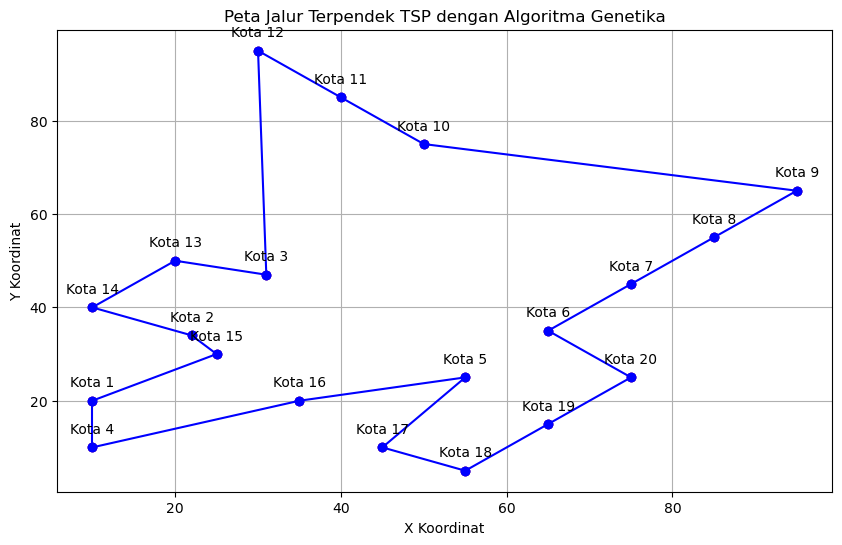

In [37]:

# Memplot jalur terpendek
plot_perjalanan(perjalanan_terbaik)


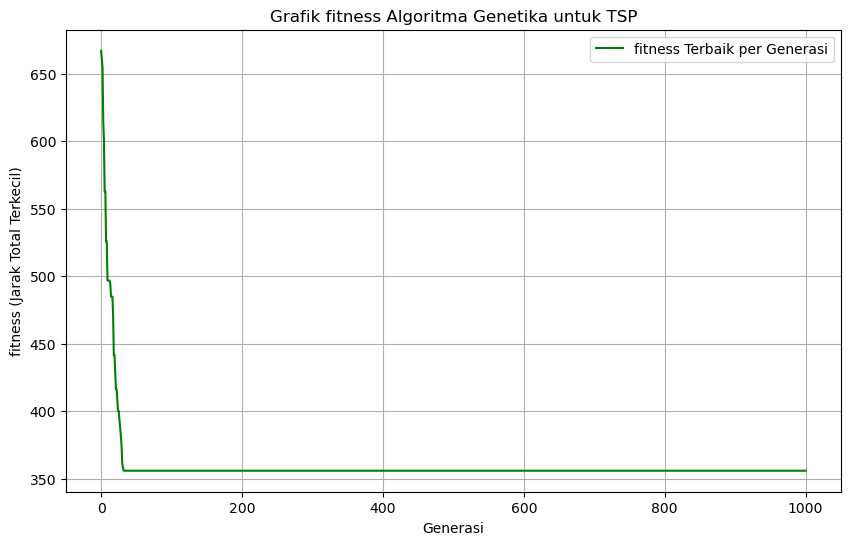

In [38]:

# Memplot grafik fitness
plot_grafik_fitness(riwayat_fitness)

### Kesimpulan Visualisasi Koordinat Kota

Dari plot yang dihasilkan oleh kode di atas, kita dapat melihat distribusi geografis dari 20 kota yang didefinisikan secara manual dalam array `kota`. Setiap kota direpresentasikan sebagai titik biru pada grafik, dengan koordinat X dan Y yang sesuai dengan tuple yang diberikan dalam array. Label yang tertera di samping setiap titik memudahkan identifikasi setiap kota dengan nomor urutnya, yang membantu dalam analisis visual tentang bagaimana kota-kota tersebut tersebar di ruang dua dimensi.

Dari hasil perhitungan didapat jarak terpendek adalah 354.09 km
dengan urutan kota sebagai berikut. 

Kota 15: (25, 30)
Kota 2: (22, 34)
Kota 4: (10, 10)
Kota 1: (10, 20)
Kota 14: (10, 40)
Kota 13: (20, 50)
Kota 3: (31, 47)
Kota 12: (30, 95)
Kota 11: (40, 85)
Kota 10: (50, 75)
Kota 9: (95, 65)
Kota 8: (85, 55)
Kota 7: (75, 45)
Kota 6: (65, 35)
Kota 20: (75, 25)
Kota 5: (55, 25)
Kota 19: (65, 15)
Kota 18: (55, 5)
Kota 17: (45, 10)
Kota 16: (35, 20)

Grafik ini sangat berguna untuk visualisasi awal dalam masalah Travelling Salesman Problem (TSP), di mana pemahaman tentang posisi relatif kota-kota dapat membantu dalam merancang strategi untuk menemukan jalur terpendek yang mengunjungi setiap kota tepat satu kali dan kembali ke kota asal. Plot ini juga membantu dalam memeriksa keakuratan input koordinat dan memastikan bahwa tidak ada kesalahan dalam penentuan posisi kota sebelum melanjutkan dengan algoritma genetika atau metode optimasi lainnya.

Dengan menggunakan visualisasi ini, pengguna dapat dengan mudah mengidentifikasi pola atau kelompok kota yang mungkin memerlukan pertimbangan khusus dalam algoritma routing, seperti kota-kota yang terletak jauh dari kelompok utama atau yang mungkin berperan sebagai 'jembatan' antara dua kelompok kota yang terpisah.